<a href="https://colab.research.google.com/github/mstkyvz/Auto-login-bypass/blob/main/testttt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Güney Marmara ve TRAI
# <center> Python Veri Analizi Eğitimi
# <center> Ödev 2

### BIST30 Endeksinin incelenmesi

In [118]:
#Required
!pip install kaleido
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
import yfinance as yf
import plotly.express as px
import plotly.io as pio
from PIL import Image


1. <i> Yahoo Finance</i> sitesinden 2021 yılına ait BIST30 endeks değerlerini indiriniz

In [120]:
import requests

url = "https://query1.finance.yahoo.com/v7/finance/download/XU030.IS?period1=1650727161&period2=1682263161&interval=1d&events=history&includeAdjustedClose=true"

response = requests.get(url)

with open("XU030.IS.csv", "wb") as f:
    f.write(response.content)

from google.colab import files

files.download("XU030.IS.csv")

# Veriyi yfinance kullanarak indirin
B100 = yf.download('XU030.IS', start='2022-01-01', end='2022-12-31')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed


2. Veriyi özet metotları ile inceleyiniz (head, info, describe)

In [121]:
# İlk 5 satır
print(B100.head())


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-01-03  2039.099976  2109.500000  2032.300049  2109.500000  2109.500000   
2022-01-04  2128.000000  2176.699951  2109.699951  2157.000000  2157.000000   
2022-01-05  2158.000000  2213.899902  2145.500000  2212.300049  2212.300049   
2022-01-06  2196.500000  2239.300049  2180.399902  2219.600098  2219.600098   
2022-01-07  2235.800049  2260.600098  2206.500000  2256.600098  2256.600098   

             Volume  
Date                 
2022-01-03  1394200  
2022-01-04  1969800  
2022-01-05  1578300  
2022-01-06  2056500  
2022-01-07  2517800  


In [122]:
# Veri bilgileri
print(B100.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
None


In [123]:
# Veriy özetleri
print(B100.describe())


              Open         High          Low        Close    Adj Close  \
count   251.000000   251.000000   251.000000   251.000000   251.000000   
mean   3267.029870  3310.997605  3225.411948  3272.907164  3272.907164   
std    1068.547302  1088.861851  1051.751157  1074.575621  1074.575621   
min    2039.099976  2109.500000  2032.300049  2070.100098  2070.100098   
25%    2467.699951  2486.349976  2457.200073  2476.949951  2476.949951   
50%    2793.800049  2813.000000  2759.000000  2785.199951  2785.199951   
75%    3838.049927  3908.299927  3764.300049  3833.050049  3833.050049   
max    5954.299805  6030.299805  5937.700195  5944.799805  5944.799805   

             Volume  
count  2.510000e+02  
mean   2.442608e+06  
std    1.030628e+06  
min    3.710000e+05  
25%    1.753950e+06  
50%    2.188600e+06  
75%    2.928500e+06  
max    7.261100e+06  


3. Veri temizleme:<br>
	• Tabloda sadece "Adj Close" (düzeltilmiş kapanış) sütununu bırakınız.<br>
	• "Adj Close" sütununu " Kapanış (TRY)" olarak yeniden adlandırınız.

In [124]:
# "Adj Close" sütununu seçme
B100 = B100 [B100.index > '2022-01-01']
B100

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2039.099976,2109.500000,2032.300049,2109.500000,2109.500000,1394200
2022-01-04,2128.000000,2176.699951,2109.699951,2157.000000,2157.000000,1969800
2022-01-05,2158.000000,2213.899902,2145.500000,2212.300049,2212.300049,1578300
2022-01-06,2196.500000,2239.300049,2180.399902,2219.600098,2219.600098,2056500
2022-01-07,2235.800049,2260.600098,2206.500000,2256.600098,2256.600098,2517800
...,...,...,...,...,...,...
2022-12-23,5836.899902,5890.700195,5794.600098,5885.200195,5885.200195,2265000
2022-12-27,5943.000000,5969.500000,5870.799805,5876.700195,5876.700195,2288000
2022-12-28,5886.399902,5892.299805,5690.500000,5789.399902,5789.399902,2400800


In [125]:
#sütun silme
B100 = B100 [[ 'Adj Close']]
B100

,Adj Close
Date,
2022-01-03,2109.500000
2022-01-04,2157.000000
2022-01-05,2212.300049
2022-01-06,2219.600098
2022-01-07,2256.600098
...,...
2022-12-23,5885.200195
2022-12-27,5876.700195
2022-12-28,5789.399902


In [126]:
# "isim değiştirme
B100.columns = ['Kapanış (TRY)']
B100

,Kapanış (TRY)
Date,
2022-01-03,2109.500000
2022-01-04,2157.000000
2022-01-05,2212.300049
2022-01-06,2219.600098
2022-01-07,2256.600098
...,...
2022-12-23,5885.200195
2022-12-27,5876.700195
2022-12-28,5789.399902


4. Tabloya yeni sütun ekleme:<br>
*   Tabloya yeni bir sütun ekleyerek Kapanış (TRY) değerlerini 1 Ocak 2021 tarihindeki kapanış değerine göre normalize ediniz (yani tüm değerleri 1 Ocak 2021 değerine bölünüz). Bu alana "Normalize" alanı diyebilirsiniz.<br>



In [127]:
# ilk değeri alır
#b100 e normalize sütunun ekliyoruz ve kapanış try yi norm a bölüyoruz
norm = B100.iloc[0,0]
B100['Normalize'] = B100 ['Kapanış (TRY)']/norm
B100

<ipython-input-127-35a30a5e6ec4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Kapanış (TRY),Normalize
Date,,
2022-01-03,2109.500000,1.000000
2022-01-04,2157.000000,1.022517
2022-01-05,2212.300049,1.048732
2022-01-06,2219.600098,1.052193
2022-01-07,2256.600098,1.069732
...,...,...
2022-12-23,5885.200195,2.789856
2022-12-27,5876.700195,2.785826
2022-12-28,5789.399902,2.744442


5. Grafik çizdirme ve yorumlama:
*   Tabloyu px.line grafiği olarak görselleştiriniz.<br>
*   BIST30 endeksinin 2021 yılı boyunca değişimini yorumlayınız.

<Axes: xlabel='Date'>

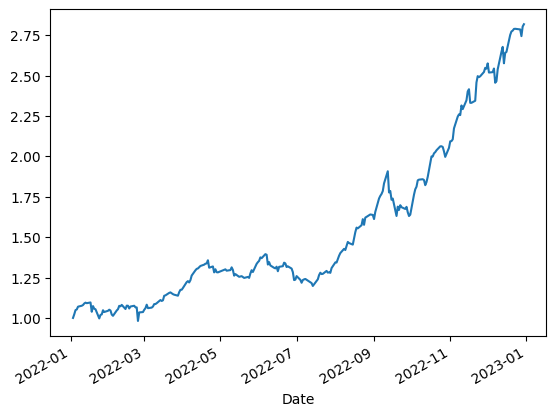

In [128]:
B100['Normalize'].plot()

In [136]:
fig=px.line(B100,x=B100.index, y = B100["Normalize"])
display(fig)

In [ ]:
from plotly.graph_objs import XAxis
px.line(B100, y='Normalize',
        width = 1000, height = 500,
        title = 'BIST30 endeksinin 2021 yılı boyunca değişimi',
        hover_data = {'Normalize' : ':.2f', 'Kapanış (TRY)' : ':.2f'},
        labels = {'Date' : 'Tarih' , 'Normalize' : 'BIST 100 ENDEKSİ (TRY)'})


> Endeks, 2022 yılının başlarında 2109 seviyesinden başlayarak yükseliş trendine girmiş ve yıl içerisinde sürekli olarak yükselmiştir. Yılın sonlarına doğru artan düzeltme hareketleri olsa da, endeks yine de yılın sonunda 5944 seviyesinde olmuştur.



6. Değişim alanlarını ekleme ve grafikte koşullu renklendirme:<br>
	• Normalize etiğiniz alan için her satırda bir önceki satırdaki Normalize değeri ile olan farkını hesaplattırınız (bu sütunu "degisim" olarak isimlendirebilirsiniz).
	• Tabloyu px.bar grafiği olarak görselleştiriniz.<br>
	• px.bar grafiğinde endeksin yükseldiği günleri "yeşil", düştüğü günleri "kırmızı" olarak görselleştiriniz.

In [ ]:
B100['degisim'] = B100['Normalize'].diff(1)
B100

In [ ]:
B100['dyon'] = B100['degisim'].map(lambda x:'Düşen gün' if x <0 else 'Yükselen gün')

In [ ]:
B100['degisim%'] = (B100['degisim']/B100['Normalize'].shift(1))*100
B100

In [ ]:
px.bar(B100, y='degisim%',
       color = 'dyon', color_discrete_map={'düşen gün' : 'red', 'yükselen gün' : 'green'})

7. Histogram çizmek:

*   px.histogram grafiğini çizdiriniz.
*   Bölüm sayısını (nbins) nasıl belirlediniz,açıklayınız.
*   Elde ettiğiniz grafiği yorumlayınız.



In [ ]:
px.histogram(B100['degisim%'])

In [ ]:
px.histogram(B100['degisim%'], nbins= 10)

> nbins=10 seçerek, veri setinin 10 eşit aralığa bölünmesini sağladık ve her sütunun belirli bir aralığı temsil etmesini sağladık.Grafiği daha güzel okumamıza ve yorumlamamıza yarıyor
